<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Spaceship_Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install ydf -U --quiet

In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

import ydf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Importando dados

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Spaceship Titanic/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Spaceship Titanic/test.csv')

# Explorando dados

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
#Contagem de nulos

def null_count(df):
  null_count = df.isnull().sum()
  return null_count

print(f'Contagem de nulos de treino: \n\n{null_count(train)}\n')
print(f'Contagem de nulos de teste: \n\n{null_count(test)}\n')

Contagem de nulos de treino: 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Contagem de nulos de teste: 

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64



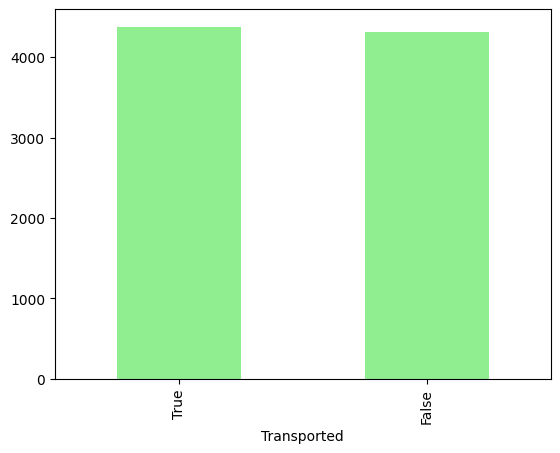

In [ ]:
# Visualizando pessoas transportadas

plot_df = train.Transported.value_counts()
plot_df.plot(kind="bar", color='lightgreen');

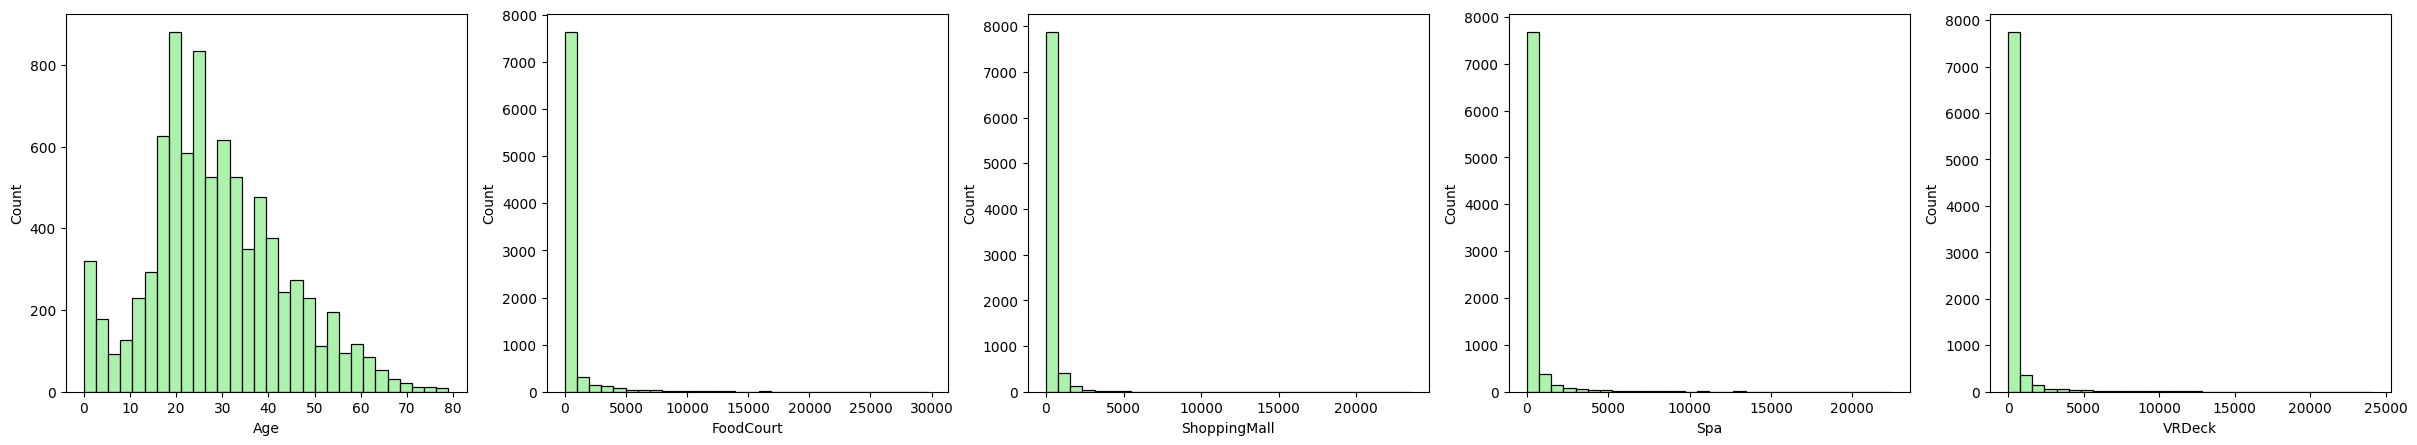

In [ ]:
# Visualizando outras variáveis numéricas

fig, ax = plt.subplots(1,5,  figsize=(30, 2))
plt.subplots_adjust(top = 2)

sns.histplot(train['Age'], color='lightgreen', bins=30, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='lightgreen', bins=30, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='lightgreen', bins=30, ax=ax[2]);
sns.histplot(train['Spa'], color='lightgreen', bins=30, ax=ax[3]);
sns.histplot(train['VRDeck'], color='lightgreen', bins=30, ax=ax[4]);

# Preparando o Dataset

In [ ]:
#Preenchendo dados faltantes
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)


In [ ]:
#Convertendo dados booleanos para inteiros

for i in ['Transported', 'CryoSleep', 'VIP']:
  train[i] = train[i].astype(int)

In [ ]:
#Os dados da "Cabin" têm 3 informações, o Deck, o número da cabine e a ala. Por isso, separei em 3 colunas

train[['Deck', 'Number', 'Side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop('Cabin', axis=1)

In [ ]:
#Separaremos o dataset de treino em treino e teste, para verificarmos a acurácia antes de aplicar no dataset que precisamos prever.

train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)


#Criando modelos

## Random Forest com Yggdrasil

In [ ]:
#Criando um modelo de Random Forest
rf = ydf.GradientBoostedTreesLearner(label="Transported", task=ydf.Task.CLASSIFICATION).train(train_df)

Train model on 6954 examples
Model trained in 0:00:50.162489


In [ ]:
#Avaliando o modelo
evaluation = rf.evaluate(test_df)
print(f'A acurácia do modelo é: {evaluation.accuracy:.2%}')

A acurácia do modelo é: 79.24%


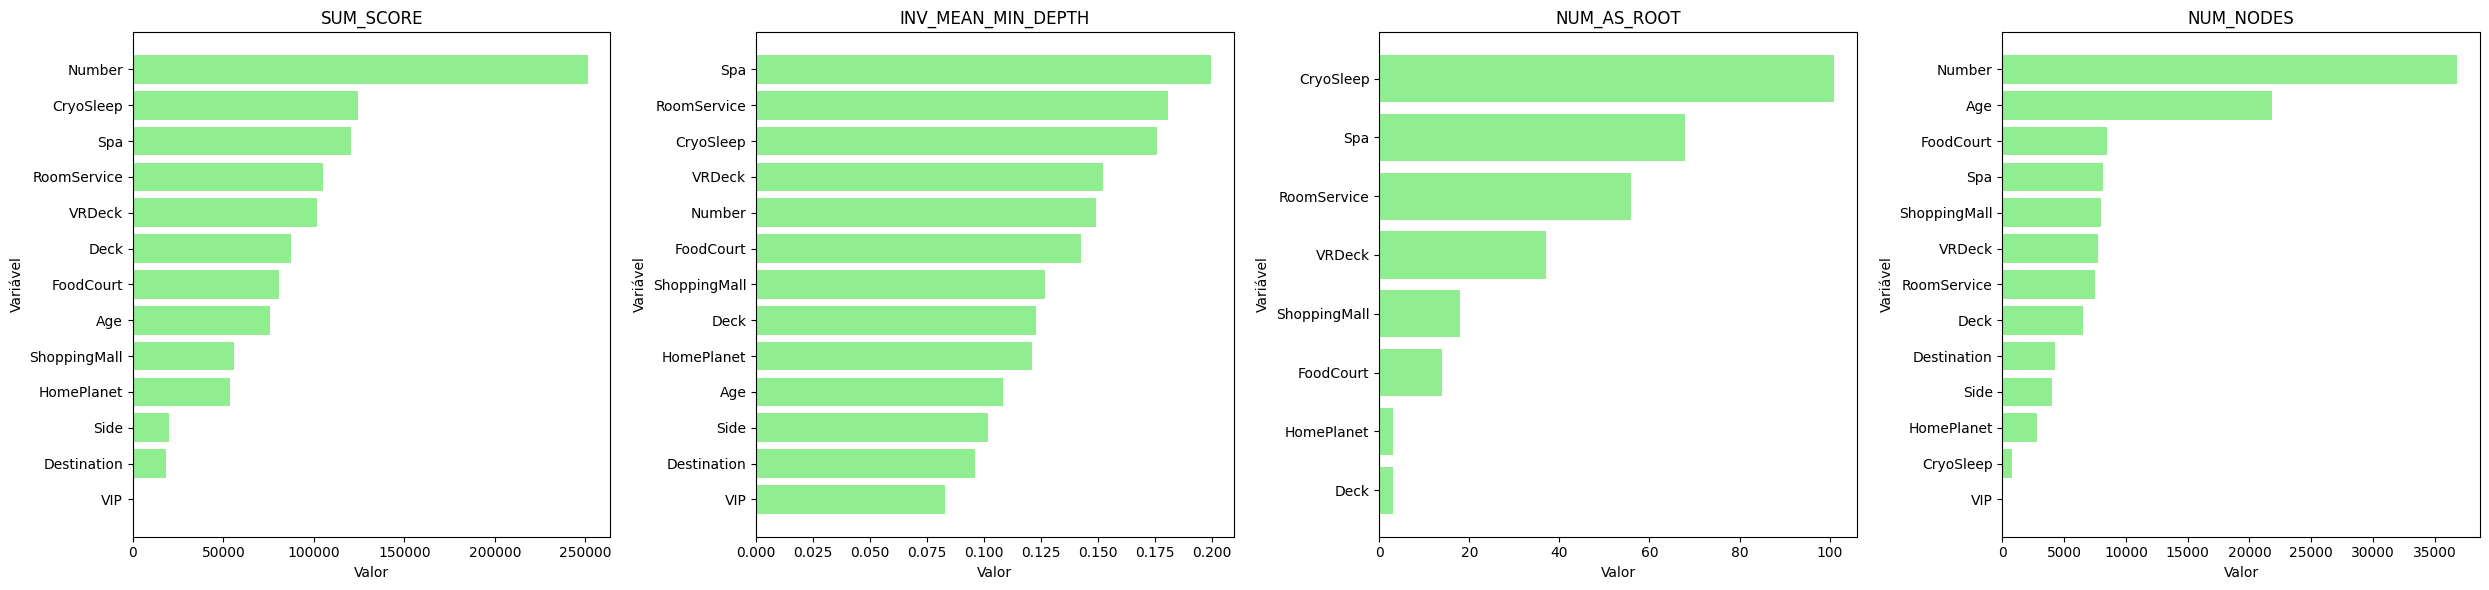

In [ ]:
# Verificando a importância de cada variável para o modelo

metrics = rf.variable_importances()

# Criar gráficos para cada métrica

metric_names = list(metrics.keys())
data_list = [metrics[metric] for metric in metric_names]

fig, axes = plt.subplots(1, len(data_list), figsize=(25, 6))
plt.subplots_adjust(wspace=0.5)

for ax, metric_name, data in zip(axes, metric_names, data_list):
    values, labels = zip(*data)
    ax.barh(labels, values, color='lightgreen')
    ax.set_title(metric_name)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Variável')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

### Criando arquivo de submissão

In [ ]:
submission_id = test.PassengerId

In [ ]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [ ]:
# Preenchendo nulos com 0

test[['VIP', 'CryoSleep']] = test[['VIP', 'CryoSleep']].fillna(value=0)

# Criando novas features

test[["Deck", "Number", "Side"]] = test["Cabin"].str.split("/", expand=True)
test = test.drop('Cabin', axis=1)

# Convertendo booleanos para inteiros
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

# Gerando previsões
predictions = rf.predict(test)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Spaceship Titanic/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv("submission.csv", index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


## XGBoost

In [ ]:
# Preparando o DF para utilizar o modelo

le = LabelEncoder()

train_df_2 = train_df.copy()
test_df_2 = test_df.copy()

train_df_2.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_df_2.drop(['Name', 'PassengerId'], axis=1, inplace=True)

for i in ['HomePlanet', 'Destination', 'Deck', 'Number', 'Side']:
  train_df_2[i] = le.fit_transform(train_df_2[i])
  test_df_2[i] = le.fit_transform(test_df_2[i])

In [ ]:
# Criando o modelo
xg = XGBClassifier(n_estimators = 1000, max_depth = 6)
xg.fit(train_df_2.drop('Transported', axis=1), train_df_2['Transported'])

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
#Avaliando o modelo

print(f"A acurácia do modelo é: {accuracy_score(test_df_2['Transported'], xg.predict(test_df_2.drop('Transported', axis=1))):.2%}")

A acurácia do modelo é: 78.15%


##Catboost

In [ ]:
# Criando o modelo
cb = CatBoostClassifier(iterations=500, depth=7, learning_rate = 0.05, verbose = False)
cb.fit(train_df_2.drop('Transported', axis=1), train_df_2['Transported'])

In [ ]:
#Avaliando o modelo

print(f"A acurácia do modelo é: {accuracy_score(test_df_2['Transported'], cb.predict(test_df_2.drop('Transported', axis=1))):.2%}")

A acurácia do modelo é: 79.18%
